##### Universidade Federal do Rio Grande do Sul (UFRGS)   
Programa de Pós-Graduação em Engenharia Civil (PPGEC)   

# PEC00025: Introduction to Vibration Theory


### Class 15 - Vibration of plates

[1.   The plate equation](#section_1)  
[2.   Static solution by approximation](#section_2)  
[3.   Potential and kinetic energies](#section_3)  
[3.1. Potential energy](#section_31)  
[3.2. Reference kinetic energy](#section_32)  
[4.   Vibration modes and frequencies](#section_4)  
[5.   Assignment](#section_5)  

---
_Prof. Marcelo M. Rocha, Dr.techn._ [(ORCID)](https://orcid.org/0000-0001-5640-1020)  
_Porto Alegre, RS, Brazil_ 


In [14]:
# Importing Python modules required for this notebook
# (this cell must be executed with "shift+enter" before any other Python cell)
import numpy as np
import matplotlib.pyplot as plt

# Modules required for surface plots
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm


## 1. The plate equation <a name="section_1"></a> 

Analogously to the bending of beams shown in the last class, for the bending
of plates it can be shown (_Theory of Plates and Shells_, by Timoshenko
and Woinowsky-Krieger, 1959) that a moment-curvature relation can be 
formulated in cartesian coordinates as:

\begin{align*}
 M_x    &=  D\left( \frac{\partial^2 w}{\partial x^2} + 
                \nu \frac{\partial^2 w}{\partial y^2} \right) \\
 M_y    &=  D\left( \frac{\partial^2 w}{\partial y^2} + 
                \nu \frac{\partial^2 w}{\partial x^2} \right) \\
 M_{xy} &= -D(1 - \nu)\left( \frac{\partial^2 w}{\partial x \, \partial y}\right) 
\end{align*}

what comes from the assumption of a thin plate undergoing small displacements 
with a linear elastic behavior. 

<img src="images/plate_bending.png" alt="Plate bending" width="400px"/>

The curvatures have been approximated by the
second derivative of the plate displacements, $w(x,y)$, in $z$ direction, such that
the curvature radius are:

$$ \frac{1}{R_x}    \approx \frac{\partial^2 w}{\partial x^2}, \hspace{8mm}
   \frac{1}{R_y}    \approx  \frac{\partial^2 w}{\partial y^2}, \hspace{8mm}
   \frac{1}{R_{xy}} \approx  \frac{\partial^2 w}{\partial x \, \partial y} $$
   
The curvature $1/R_{xy}$ is also called _twist_, while the parameter $D$ 
is called the _plate flexular rigidity_ or simply _plate constant_:

$$ D = \frac{E \; t^3}{12(1 - \nu^2)} $$

with $E$ being the elasticity (Young's) modulus, $\nu$ the Poisson's ratio,
and $t$ the plate thickness.

For a given load $q(x,y)$ orthogonal to the plane surface, it can be shown 
that the plate transversal displacements, $w(x,y)$, are the solution of the 
_Germaine-Lagrange_ bi-harmonic equation:

$$ \nabla^2 \nabla^2 \, w = -\frac{p}{D} $$

which in cartesian coordinates reads:

$$ \frac{\partial^4 w}{\partial x^4} +
   2\frac{\partial^4 w}{\partial x^2 \partial y^2} + 
   \frac{\partial^4 w}{\partial y^4} = -\frac{p(x,y)}{D} $$

Observe the similarity of the equation above with the beam equation:

$$ \frac{\partial^4 w}{\partial x^4} = -\frac{p(x)}{EI} $$

The equations above could also be formulated in cylindrical coordinates for
analysing circular plates, but in this notebook we shall focuse on retangular
plates with the conventions depicted in the following figure, taken 
from Timoshenko's book:

<img src="images/Timoshenko_plate.png" alt="Timoshenko plate" width="280px"/>

This notebook is concerned with _approximate solutions aiming at the
estimation of dynamic response of plates_, rather than daring to be a complete
course on plate analysis. 
Specifically, we shall look at the potential elastic, $V$, and the
reference kinetic energies estimates, $T_{\rm ref}$, in order to obtain the 
plate natural vibration frequencies through Rayleigh's quotient. 
Once natural frequencies are known, it is then possible to estimate the plate 
response under dynamic loading by modal superposition.

We will use as an example a $8\times5$ meters simply supported thin reinforced 
concrete plate, with thickness $t = 0.1$m. 
The elasticity modulus for concrete is assumed to be $E = 30$GPa and the 
Poisson's ratio is $\nu = 0.2$. 
The material average density (specific mass) is assumed to be $2500 {\rm kg/m^3}$.
In the script below we define the plate parameters and carry out a discretization
of the plate surface.


In [15]:
# Material data

E  = 30.e9         # elasticity modulus (N/m2)
nu = 0.2           # Poisson's ratio (non-dim)
ro = 2500.         # density (specific mass, kg/m^3)
t  = 0.1           # plate thickness (m)
a  = 8.0           # dimension in x direction (m)
b  = 5.0           # dimension in y direction (m)

D  = E*t**3/12/(1 - nu**2)   # plate constant (Nm)
mu = ro*t                    # mass per unit area (kg/m^2)

# Domain discretization

N  = 40            # number of nodes per meter
nx = int(N*a)      # number of discretization points in x
ny = int(N*b)      # number of discretization points in y

dx = a/(nx - 1)    # discretization length in x direction
dy = b/(ny - 1)    # discretization length in y direction

sx = 1 + int(a)    # plot stride in x direction
sy = 1 + int(b)    # plot stride in y direction

x    = np.linspace(0, a, nx)          # x axis discretization
y    = np.linspace(0, b, ny)          # y axis discretization

X, Y = np.meshgrid(x, y, copy=False)  # xy mesh definition (save memory)


Now we propose a tentative solution, $w_0(x,y)$, that respect the kinematic boundary 
conditions both in terms of displacements and rotations. 
For the simply suported plate, we assume that a product of two half sine functions 
may be used:

$$ w_0(x,y) = w_{\rm max} \sin\left( i\frac{\pi x}{a} \right)  \sin\left( j\frac{\pi y}{b} \right)  $$

com $i = j = 1$, where $w_{\rm max}$ maximum amplitude that must occur at the center of the plate.


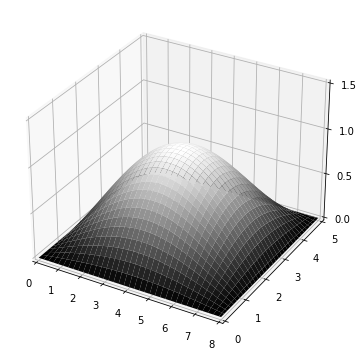

In [39]:
# Hypothetical solution (by now with unity amplitude)

W0 = 1.0 * np.sin(np.pi*X/a) * np.sin(np.pi*Y/b)

# Visualization

f1 = plt.figure(1, figsize=(5,5))
ax = f1.add_subplot(projection='3d')

ax.plot_surface(X, Y, W0, 
                rstride=sy, cstride=sx, 
                cmap=cm.gray, shade=True);

ax.set_xticks(np.linspace(0,   a, sx));  ax.set_xlim((0,   a));
ax.set_yticks(np.linspace(0,   b, sy));  ax.set_ylim((0,   b));
ax.set_zticks(np.linspace(0, 1.5,  4));  ax.set_zlim((0, 1.5));
    
f1.tight_layout()
plt.show()


The function defined above has a unity amplitude, what leaves the actual amplitude to be
still evaluated according to the type of analysis (imposed load or free vibration).


## 2. Static solution by approximation <a name="section_2"></a> 

Most of the approximate solutions requires the calculation of second order derivatives
of function $w(x,y)$. 

To provide a general differentiation scheme, in the following scripts
we use ```numpy``` resources to fit, evaluate, and differentiate a 2D polynomial of 
fourth order:

$$ w(x,y) = \sum_i \sum_j \, C_{ij} \, x^i \, y^j $$

The data that must be provided to the least squares fitting algorithim can be the
discretized tentative function, but also any bunch of coordinates that resembles
the expected deformed shape. You can even _draw_ this deformed shape and measure
the coordinates from your drawing (!!!).
The important issue is satisfying the kinematic boundary conditions 
(displacements and rotations).

Below is a demonstration how to fit such polynomial to the proposed solution:


In [17]:
# Fitting a fourth order 2-D polynomial to w(x,y)

X = X.flatten()    # converting matrices into 1-D vectors
Y = Y.flatten()
B = W0.flatten()

#             Ci0    Ci1     Ci2        Ci3        Ci4
A = np.array([X*0+1, Y,      Y**2,      Y**3,      Y**4,
              X,     X*Y,    X*Y**2,    X*Y**3,    X*Y**4,
              X**2,  X**2*Y, X**2*Y**2, X**2*Y**3, X**2*Y**4,
              X**3,  X**3*Y, X**3*Y**2, X**3*Y**3, X**3*Y**4,
              X**4,  X**4*Y, X**4*Y**2, X**4*Y**3, X**4*Y**4]).T

Cij, resid, rank, singv = np.linalg.lstsq(A, B, rcond=None)
Cij = Cij.reshape(5,5)

np.set_printoptions(precision=2)
print(Cij)


[[ 1.52e-06  7.74e-04  2.67e-05 -7.26e-05  7.26e-06]
 [ 4.70e-04  2.38e-01  8.22e-03 -2.24e-02  2.24e-03]
 [ 1.02e-05  5.16e-03  1.78e-04 -4.84e-04  4.84e-05]
 [-1.72e-05 -8.74e-03 -3.01e-04  8.20e-04 -8.20e-05]
 [ 1.08e-06  5.46e-04  1.88e-05 -5.12e-05  5.12e-06]]


The fitted polynomial is evaluated and plotted below to demonstrate the 
quality of the fitting procedure:


Root mean square error across the plate: 0.038%


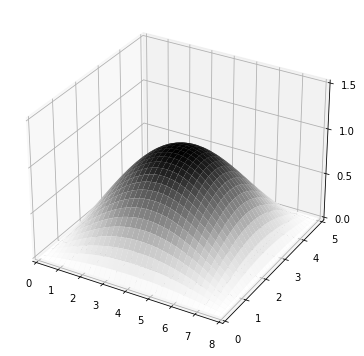

In [18]:
# Reconstituting the approximated function

X   = X.reshape(ny,nx)   # back from 1-D vectors to matrices
Y   = Y.reshape(ny,nx)

W1  = np.polynomial.polynomial.polyval2d(X, Y, Cij)
err = np.sqrt(np.sum((W0 - W1)**2)/nx/ny)

print('Root mean square error across the plate: {0:5.3f}%'.format(100*err))

# Visualization

f2 = plt.figure(2, figsize=(5,5))
ax = f2.add_subplot(projection='3d')

ax.plot_surface(X, Y, W1, 
                rstride=sy, cstride=sx, 
                cmap=cm.Greys, shade=True)

ax.set_xticks(np.linspace(0,   a, sx));  ax.set_xlim((0,   a));
ax.set_yticks(np.linspace(0,   b, sy));  ax.set_ylim((0,   b));
ax.set_zticks(np.linspace(0, 1.5,  4));  ax.set_zlim((0, 1.5));
    
f2.tight_layout()
plt.show()


The polynomial approximation allow us to calculate the partial derivatives without the
need of a numerical differentiation scheme. 
The function below implements the derivative for a 2D polynomial:


In [19]:
# Derivatives of the 2D polynomial: defining a function

def polyder2D(C, kx=0, ky=0):

    derC   = C.copy()
    nx, ny = C.shape
    
    for ix in range(kx):
        for ii in range(nx-1):
            derC[ii,:]   = (ii+1)*derC[ii+1,:]
            derC[ii+1,:] =  0.

    for iy in range(ky):
        for jj in range(ny-1):
            derC[:,jj]   = (jj+1)*derC[:,jj+1]
            derC[:,jj+1] =  0.
    
    return derC


Observe that the proposed function keeps the polynomial order (size of the coefficients
matrix minus 1) to allow some direct algebra with the coefficients, but the non-zero 
matrix elements will ensure the the correct order reduction.


[[  1.62   1.5    2.77  -1.23   0.12]
 [ 46.43  59.01 -11.8    0.     0.  ]
 [  2.06  -7.38   1.48   0.     0.  ]
 [ -1.97   0.     0.     0.     0.  ]
 [  0.12   0.     0.     0.     0.  ]]


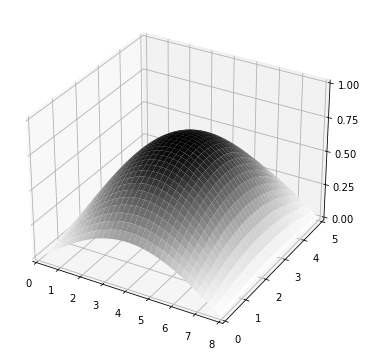

In [20]:
# Check the bi-harmonic equation

Cxxxx =  polyder2D(Cij, 4, 0)
Cxxyy =  polyder2D(Cij, 2, 2)
Cyyyy =  polyder2D(Cij, 0, 4)

p_D   =  Cxxxx + 2*Cxxyy + Cyyyy
p     =  D*np.polynomial.polynomial.polyval2d(X, Y, p_D)

print(1000*p_D)  # coefficients of bi-harmonic equation

# Visualization

f3 = plt.figure(3, figsize=(5,5))
ax = f3.add_subplot(projection='3d')

ax.plot_surface(X, Y, p/1e6, 
                rstride=sy, cstride=sx, 
                cmap=cm.Greys, shade=True)

ax.set_xticks(np.linspace(0, a, sx));  ax.set_xlim(( 0, a));
ax.set_yticks(np.linspace(0, b, sy));  ax.set_ylim(( 0, b));
ax.set_zticks(np.linspace(0, 1,  5));  ax.set_zlim(( 0, 1));
    
f3.tight_layout()
plt.show()


The plot above represents the load $p_0(x,y)$ causing the tentative 
solution, $w_0(x,y)$. 
The solution $w(x,y)$ for an arbitraty load $p(x,y)$ is not that simple to obtain,
for it demands to solve the bi-harmonic equation with some given boundary conditions.

Many approximate methods have been proposed.
For instance, by energy conservation one could assume that the work of any external
loading $p(x,y)$ upon the tentative function $w_0(x,y)$, denoted by $W_{\rm ext}$, with:

$$ W_{\rm ext} = \frac{1}{2} \iint_A p(x,y) \, w_0(x,y) \, dA = V $$

must be equal to the internal deformation energy, $V$, associated to $w_0(x,y)$. 
This condition may lead to the unknown amplitude $w_{\rm max}$. 

For our rectangular simply-supported plate, let us assume that we have a
constant distributed load, $p(x,y) = 2{\rm kN/m^2}$. Hence:


In [21]:
p0   =  1.                       # constant loading (N/m^2)
Wext =  np.sum(p0*W1/2)*dx*dy    # total work done (J)

print('Total work done by constant load: {0:5.2f}J'.format(Wext/1000))


Total work done by constant load:  0.01J


Recall that this external work corresponds to $w_{\rm max} = 1$. The calculation of internal deformation energy, $V$, is presented in the next section.

## 3. Potential and kinetic energies <a name="section_3"></a> 

### 3.1. Potential energy <a name="section_31"></a> 

The potential elastic energy per unit area of a thin plate is given by:

$$ dV = \frac{1}{2}D \left\{ 
        \left( \frac{\partial^2 w}{\partial x^2} + \frac{\partial^2 y}{\partial y^2} \right)^2
        - 2(1 - \nu) \left[
        \frac{\partial^2 w}{\partial x^2} \frac{\partial^2 y}{\partial y^2}
        - \left( \frac{\partial^2 w}{\partial x \partial y} \right)^2
        \right] \right\} \, dx \, dy $$

which must be integrated over the plate total area to give the total elastic energy $V$.
Now we can calculate the specific energy directly from the derived polynomials, associated
with a unitary displacement at the plate center:


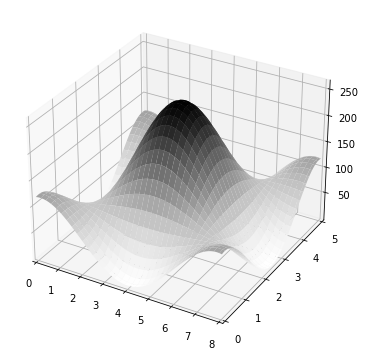

In [22]:
# Calculate specific elastic energy

Cxx =  polyder2D(Cij, 2, 0)
Cxy =  polyder2D(Cij, 1, 1)
Cyy =  polyder2D(Cij, 0, 2)

wxx =  np.polynomial.polynomial.polyval2d(X, Y, Cxx)
wyy =  np.polynomial.polynomial.polyval2d(X, Y, Cyy)
wxy =  np.polynomial.polynomial.polyval2d(X, Y, Cxy)

dV  = ((wxx + wyy)**2 - 2*(1 - nu)*(wxx*wyy - wxy**2))*D/2

# Visualize energy density

f4 = plt.figure(3, figsize=(5,5))
ax = f4.add_subplot(projection='3d')

ax.plot_surface(X, Y, dV/1000, 
                rstride=sy, cstride=sx, 
                cmap=cm.Greys, shade=True)

ax.set_xticks(np.linspace(0,   a, sx));  ax.set_xlim((0,   a));
ax.set_yticks(np.linspace(0,   b, sy));  ax.set_ylim((0,   b));
    
f4.tight_layout()
plt.show()


The total elastic potential energy can be obtained by integrating the specific energy:

In [23]:
V = np.sum(dV)*dx*dy

print('Total elastic energy in the plate: {0:5.0f}kJ'.format(V/1000))


Total elastic energy in the plate:  3933kJ


With this value, it becomes possible to calculate which displacement amplitude, $W_0$,
satisfies the energy conservation condition with:

$$ w_{\rm max} = p \; \frac{W_{\rm ext}}{V}$$

ou:

$$ p  = \left( \frac{V}{W_{\rm ext}} \right) \;  w_{\rm max} = K w_{\rm max}$$


In [24]:
print('Stiffness coefficient at the plate center: {0:6.0f} (N/m2)/m'.format(V/Wext))
print('Displacement for p = 2000N/m2:             {0:6.2f}  mm'.format(1000*2000*Wext/V))

Stiffness coefficient at the plate center: 485170 (N/m2)/m
Displacement for p = 2000N/m2:               4.12  mm


For the example, the exact maximum displacement has been calculated with the
_engineering Fundamentals site_ ([efunda](https://www.efunda.com/formulae/solid_mechanics/plates/calculators/SSSS_PUniform.cfm)) as $w_{\rm max} = 3.99$mm, what implies that
the tentative function leads to an error in the order of only 3%.


### 3.2. Reference kinetic energy <a name="section_32"></a> 

On the other hand the reference kinetic energy per unit area depends directly 
from the solution $w(x,y)$, which is assumed to be quite close to the first vibration mode
(it was chosen intentionally so!!!) as:

$$ dT_{\rm ref} = \frac{1}{2} \mu w^2 \, dx \, dy$$

which can be easily evaluated and integrated with the tentative solution:


In [27]:
dTr = (W0**2)*mu/2
Tr  =  np.sum(dTr)*dx*dy

print('Total kinetic reference energy in the plate: {0:5.0f}J'.format(Tr))


Total kinetic reference energy in the plate:  1250J


Once both potential and reference kinetic energies are known, the principle of minimum
Rayleigh quotient can be used for calculating the natural frequency estimated with
the tentative solution. This is demonstrated in the next section.


## 4. Vibration modes and frequencies <a name="section_4"></a> 

The table below was taken from a _Sonderausdruck_ (special edition) of the german _Betonkalender_ 
(concrete almanac), 1988. The table shows the natural frequencies and vibration modes for rectangular
plates with some common kinematic boundary conditions:

<img src="images/plates.png" alt="Plates modal shapes" width="640px"/>


In [28]:
f0 = np.sqrt(D/mu)*((np.pi/a)**2 +(np.pi/b)**2)/2/np.pi
f1 = np.sqrt(V/Tr)/2/np.pi

print('Exact frequency for the given thin plate:      {0:5.2f}Hz'.format(f0))
print('Estimated modal frequency for the given shape: {0:5.2f}Hz'.format(f1))


Exact frequency for the given thin plate:       8.92Hz
Estimated modal frequency for the given shape:  8.93Hz


## 5. Assignments <a name="section_5"></a> 

Apresentar o modelo estrutural proposto submetido a uma carga dinâmica definida como a densidade espectral, com valor r.m.s. prescrito, de uma força concentrada (aplicada no topo para estruturas verticais, e no centro para estruturas horizontais). Resolver:

1. no domínio do tempo (simulação da série temporal e solução por superposição modal através de Duhamel) e 
2. no domínio da frequência (integrando o espectro da força modal multiplicado pela função de admitância), calculando o espectro da resposta e seu valor r.m.s. e pico (fórmula de Davenport).

Apresentar os resultados e gráficos pertinentes.
